# Project 1

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [486]:
import urllib3
http = urllib3.PoolManager()
r = http.request('GET', 
"https://raw.githubusercontent.com/dwyl/english-words/master/words.txt", 
preload_content=False)
with open("data/words.txt", 'wb') as out:
    data = r.read()
    out.write(data)
r.release_conn()

C:\Users\gmanish\AppData\Local\Continuum\Anaconda\envs\py36\lib\site-packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


4862966

In [11]:
word_list = open('data/words.txt').readlines()
word_list = map(str.strip, word_list)

In [12]:
word_list = [word for word in word_list if len(word) == 3]
word_list = [word for word in word_list if word[0].islower()]
word_list = [word for word in word_list if word.isalpha()]
word_list = list(map(str.lower, word_list))
len(word_list)

1017

In [13]:
import numpy as np
word_list = np.asarray(word_list)
word_list.dtype #unicode
word_list.sort()

dtype('<U3')

In [14]:
word_bytes = np.ndarray((word_list.size, 
word_list.itemsize), dtype='uint8',
buffer=word_list.data)
# each unicode character is four bytes long. 
# We only need first byte
# we know that there are 3 characters per word
word_bytes.shape
word_bytes = word_bytes[:, ::word_list.itemsize//3]
word_bytes.shape

(1017, 12)

(1017, 3)

In [15]:
word_list[0:4]
word_bytes[0:4]
from scipy.spatial.distance import pdist, squareform
from scipy.sparse import csr_matrix
#pdist: Pairwise distances bet. obs. in n-D space
hamming_dist = pdist(word_bytes, metric='hamming')
hamming_dist.shape
(1017*1017-1017)/2

array(['aah', 'aal', 'abb', 'abd'], 
      dtype='<U3')

array([[ 97,  97, 104],
       [ 97,  97, 108],
       [ 97,  98,  98],
       [ 97,  98, 100]], dtype=uint8)

(516636,)

516636.0

In [16]:
# Squareform: Converts a vector-form distance vector 
# to a square-form distance matrix
squareform(hamming_dist)[0:4,0:4]
# there are three characters in each word
mat=squareform(hamming_dist < 1.5 / 3)
mat.shape
mat[0:4,0:4]
graph = csr_matrix(mat)

array([[ 0.        ,  0.33333333,  0.66666667,  0.66666667],
       [ 0.33333333,  0.        ,  0.66666667,  0.66666667],
       [ 0.66666667,  0.66666667,  0.        ,  0.33333333],
       [ 0.66666667,  0.66666667,  0.33333333,  0.        ]])

(1017, 1017)

array([[False,  True, False, False],
       [ True, False, False, False],
       [False, False, False,  True],
       [False, False,  True, False]], dtype=bool)

In [17]:
i1 = word_list.searchsorted('and')
i2 = word_list.searchsorted('dog')
word_list[i1]
word_list[i2]

'and'

'dog'

In [18]:
from scipy.sparse.csgraph import dijkstra
distances, predecessors = dijkstra(graph, 
indices=i1,return_predecessors=True)
print(distances[i2])

5.0


In [19]:
path = []
i = i2
while i != i1:
    path.append(word_list[i])
    i = predecessors[i]
path.append(word_list[i1])
print(path[::-1])

['and', 'aud', 'mud', 'mug', 'dug', 'dog']


In [20]:
from scipy.sparse.csgraph import connected_components
N_components, component_list = connected_components(graph)
print(N_components)
component_list.shape
component_list[0:5]

9


(1017,)

array([0, 0, 0, 0, 0])

In [21]:
[np.sum(component_list == i) for i in range(N_components)]


[1009, 1, 1, 1, 1, 1, 1, 1, 1]

In [22]:
[list(word_list[np.where(component_list == i)]) for i in range(1, N_components)]

[['bcf'], ['bdl'], ['epi'], ['mmf'], ['sml'], ['wjc'], ['xcl'], ['xyz']]

In [23]:
distances, predecessors = dijkstra(graph, return_predecessors=True)
max_distance = np.max(distances[~np.isinf(distances)])
print(max_distance)


11.0


In [24]:
i1, i2 = np.where(distances == max_distance)
list(zip(word_list[i1], word_list[i2]))
type(i1)

[('dlr', 'hmm'),
 ('dlr', 'kmc'),
 ('hmm', 'dlr'),
 ('hmm', 'lbf'),
 ('hmm', 'rfz'),
 ('hmm', 'tfr'),
 ('kmc', 'dlr'),
 ('kmc', 'tfr'),
 ('lbf', 'hmm'),
 ('rfz', 'hmm'),
 ('tfr', 'hmm'),
 ('tfr', 'kmc')]

numpy.ndarray

In [25]:
for j,i in zip(i1,i2):
    path = []
    while i != j:
        path.append(word_list[i])
        i = predecessors[j,i]
    path.append(word_list[j])
    print(path[::-1])

['dlr', 'tlr', 'tlo', 'too', 'tot', 'tgt', 'ugt', 'ust', 'usu', 'umu', 'umm', 'hmm']
['dlr', 'tlr', 'tlo', 'blo', 'blk', 'ilk', 'ick', 'ich', 'iph', 'kph', 'kpc', 'kmc']
['hmm', 'umm', 'umu', 'usu', 'ush', 'bsh', 'boh', 'boo', 'blo', 'tlo', 'tlr', 'dlr']
['hmm', 'umm', 'umu', 'usu', 'ust', 'ast', 'abt', 'abl', 'dbl', 'dbw', 'lbw', 'lbf']
['hmm', 'umm', 'ump', 'unp', 'uns', 'uhs', 'chs', 'cfs', 'cfm', 'sfm', 'sfz', 'rfz']
['hmm', 'umm', 'umu', 'usu', 'ush', 'bsh', 'boh', 'boo', 'blo', 'tlo', 'tlr', 'tfr']
['kmc', 'kpc', 'kph', 'iph', 'ich', 'ick', 'ilk', 'blk', 'blo', 'tlo', 'tlr', 'dlr']
['kmc', 'kpc', 'kph', 'iph', 'ich', 'ick', 'ilk', 'blk', 'blo', 'tlo', 'tlr', 'tfr']
['lbf', 'lbw', 'dbw', 'daw', 'baw', 'bah', 'bsh', 'ush', 'usu', 'umu', 'umm', 'hmm']
['rfz', 'rfb', 'rub', 'rud', 'rnd', 'end', 'enc', 'unc', 'unp', 'ump', 'umm', 'hmm']
['tfr', 'tlr', 'tlo', 'too', 'tot', 'tgt', 'ugt', 'ust', 'usu', 'umu', 'umm', 'hmm']
['tfr', 'tlr', 'tlo', 'blo', 'blk', 'ilk', 'ick', 'ich', 'iph', '

# Project 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
#Reading the dataset in a dataframe using Pandas
df = pd.read_csv("data/train_LoanPredDataset.csv") 

In [4]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.dtypes 

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.shape

(614, 13)

In [8]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [9]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

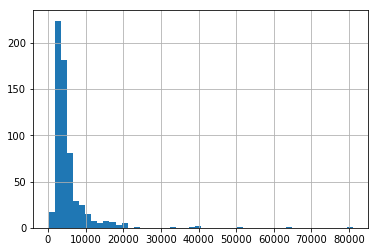

In [10]:
%matplotlib inline
df['ApplicantIncome'].hist(bins=50);

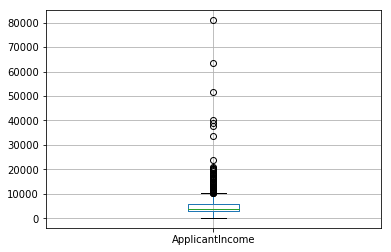

In [11]:
df.boxplot(column='ApplicantIncome');

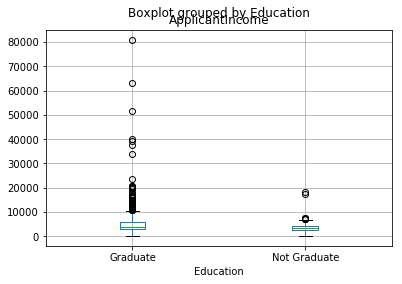

In [12]:
df.boxplot(column='ApplicantIncome', by = 'Education');

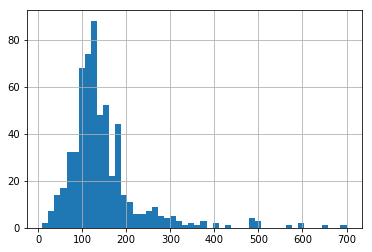

In [13]:
df['LoanAmount'].hist(bins=50);

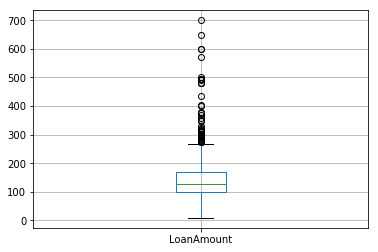

In [14]:
df.boxplot(column='LoanAmount');

In [15]:
temp1 = df['Credit_History'].value_counts(ascending=True)
print('Frequency Table for Credit History:')
print(temp1)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [16]:
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],
                       aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Probility of getting loan for each Credit History class:')
print(temp2)

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


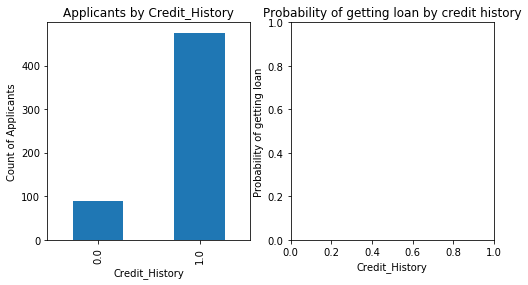

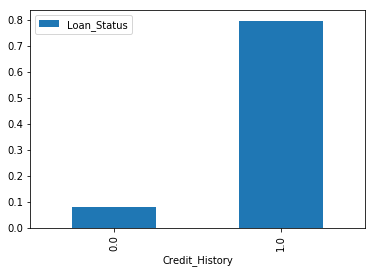

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121);
ax1.set_xlabel('Credit_History');
ax1.set_ylabel('Count of Applicants');
ax1.set_title("Applicants by Credit_History");
temp1.plot(kind='bar');

ax2 = fig.add_subplot(122);
temp2.plot(kind = 'bar');
ax2.set_xlabel('Credit_History');
ax2.set_ylabel('Probability of getting loan');
ax2.set_title("Probability of getting loan by credit history");

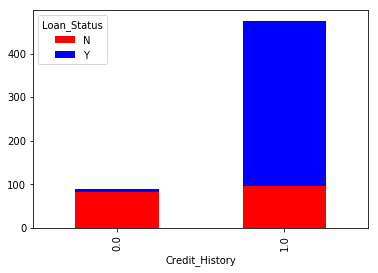

In [18]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, 
           color=['red','blue'], grid=False);

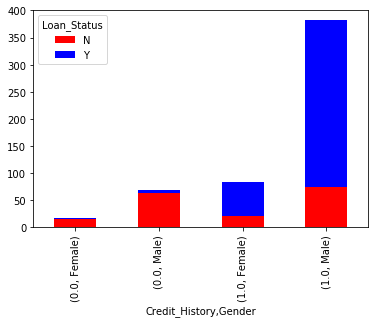

In [19]:
temp3 = pd.crosstab([df['Credit_History'],df['Gender']], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, 
           color=['red','blue'], grid=False);

In [20]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
#df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

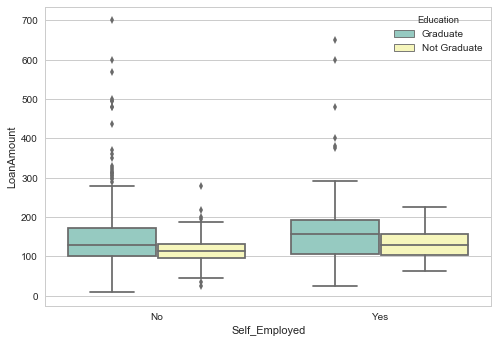

In [22]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x="Self_Employed", y="LoanAmount", hue="Education",              
data=df, palette="Set3")

In [23]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [24]:
df['Self_Employed'].fillna('No',inplace=True)

In [25]:
table = df.pivot_table(values='LoanAmount', 
index='Self_Employed' ,columns='Education', aggfunc=np.median)
table
# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), 
                        inplace=True)

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [26]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

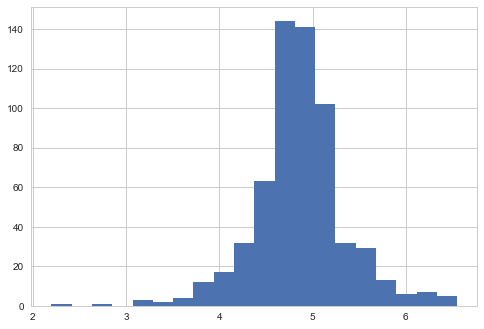

In [27]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

df['LoanAmount_log'].hist(bins=20);

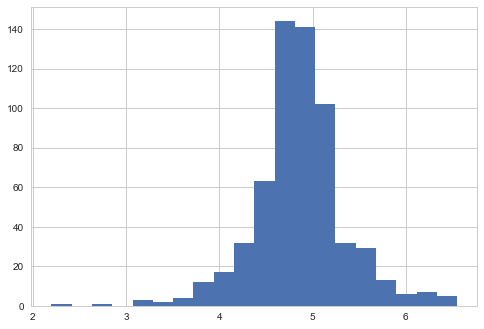

In [28]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20);

In [29]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [30]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [31]:
df['Gender'].fillna('Male',inplace=True)

In [32]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [33]:
df['Married'].fillna('Yes',inplace=True)

In [34]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [35]:
df['Dependents'].fillna('0',inplace=True)

In [36]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [37]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean()
                              ,inplace=True)

In [38]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [39]:
df['Credit_History'].fillna(1.0,inplace=True)

In [40]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education',
           'Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and assessing performance
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))
  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

C:\Users\gmanish\AppData\Local\Continuum\Anaconda\envs\py36\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
import random
random.seed(1)
model = DecisionTreeClassifier()
outcome_var = 'Loan_Status'
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 78.179%


In [44]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [45]:
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [66]:
df_test = pd.read_csv("data/test_LoanPredDataset.csv") 

df_test['Self_Employed'].fillna('No',inplace=True)
df_test['LoanAmount'].fillna(df_test[df_test['LoanAmount'].isnull()].apply(fage, axis=1), 
                        inplace=True)
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])
df_test['TotalIncome'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['TotalIncome_log'] = np.log(df_test['TotalIncome'])
df_test['Gender'].fillna('Male',inplace=True)
df_test['Married'].fillna('Yes',inplace=True)
df_test['Dependents'].fillna('0',inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mean()
                              ,inplace=True)
df_test['Credit_History'].fillna(1.0,inplace=True)
var_mod = ['Gender','Married','Dependents','Education',
           'Self_Employed','Property_Area', 'Loan_Status']
#df_test.Loan_Status
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i])

In [67]:
model = LogisticRegression()
predictor_var = ['Credit_History']
model.fit(df[predictor_var],df[outcome_var])
predictions = model.predict(df_test[predictor_var])
predictions
df_test.shape
#df_test.Loan_Status

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1,

(367, 16)

In [62]:
#Print test accuracy
test_accuracy = metrics.accuracy_score(predictions,df_test[outcome_var])
print("Test Data Accuracy : %s" % "{0:.3%}".format(test_accuracy))

Test Data Accuracy : 80.381%


# Project 3

In [397]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('data/ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('data/ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('data/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)
users.shape
ratings.shape
movies.shape
movie_ratings.shape
lens.shape

(943, 5)

(100000, 4)

(1682, 5)

(100000, 8)

(100000, 12)

In [398]:
most_rated = lens.groupby('title').size().sort_values(ascending=False)[:25]
most_rated

title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Fu

In [399]:
lens.title.value_counts()[:25]

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Titanic (1997)      

In [400]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()
movie_stats.columns

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

MultiIndex(levels=[['rating'], ['size', 'mean']],
           labels=[[0, 0], [0, 1]])

In [401]:
# sort by rating average
movie_stats.sort_values([('rating', 'mean')], ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

In [402]:
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:5]

rating          
                                   size      mean
title                                            
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230

In [403]:
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]

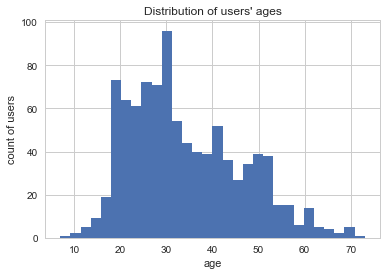

In [404]:
users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

In [405]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,60,60-69
397,21,20-29
459,33,30-39
524,30,30-39
782,23,20-29
995,29,20-29
1229,26,20-29
1664,31,30-39
1942,24,20-29
2270,32,30-39


In [406]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [407]:
lens.set_index('movie_id', inplace=True)
lens.index
by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

Int64Index([  1,   4,   5,   7,   8,   9,  11,  12,  15,  17,
            ...
            354, 362, 683, 689, 690, 748, 751, 879, 894, 901],
           dtype='int64', name='movie_id', length=100000)

title                 age_group
Air Force One (1997)  10-19        3.647059
                      20-29        3.666667
                      30-39        3.570000
                      40-49        3.555556
                      50-59        3.750000
                      60-69        3.666667
                      70-79        3.666667
Alien (1979)          10-19        4.111111
                      20-29        4.026087
                      30-39        4.103448
                      40-49        3.833333
                      50-59        4.272727
                      60-69        3.500000
                      70-79        4.000000
Aliens (1986)         10-19        4.050000
Name: rating, dtype: float64

In [409]:
groupedTab=by_age.rating.mean().unstack(1).fillna(0)
len(groupedTab)
groupedTab[:10]

50

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
Air Force One (1997),0.0,3.647059,3.666667,3.570000,3.555556,3.750000,3.666667,3.666667
Alien (1979),0.0,4.111111,4.026087,4.103448,3.833333,4.272727,3.500000,4.000000
Aliens (1986),0.0,4.050000,4.087719,3.887640,3.526316,4.235294,3.800000,3.000000
Apollo 13 (1995),4.0,3.954545,3.845455,4.064935,3.822222,4.187500,3.750000,4.000000
Back to the Future (1985),0.0,4.037037,3.720588,3.915789,4.036364,3.500000,3.857143,4.000000
"Birdcage, The (1996)",0.0,3.217391,3.413223,3.514286,3.500000,3.346154,3.888889,0.000000
Braveheart (1995),0.0,4.384615,4.194915,4.156627,4.051282,3.956522,3.714286,4.000000
Conspiracy Theory (1997),0.0,3.565217,3.382114,3.419355,3.465116,3.538462,2.600000,0.000000
Contact (1997),5.0,3.693878,3.785714,3.847458,3.866667,3.739130,3.777778,0.000000


In [410]:
groupedTab.std(1).sort_values()[-5:]

title
Schindler's List (1993)              1.871173
E.T. the Extra-Terrestrial (1982)    1.874382
Fugitive, The (1993)                 1.890909
Godfather, The (1972)                1.988730
Shawshank Redemption, The (1994)     2.027538
dtype: float64

In [420]:
lens = pd.merge(movie_ratings, users)
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [421]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [422]:
pivoted.reset_index('movie_id', inplace=True)
pivoted.shape
pivoted.head()

(1682, 4)

sex,movie_id,F,M,diff
title,,,,
Toy Story (1995),1,3.789916,3.909910,0.119994
GoldenEye (1995),2,3.368421,3.178571,-0.189850
Four Rooms (1995),3,2.687500,3.108108,0.420608
Get Shorty (1995),4,3.400000,3.591463,0.191463
Copycat (1995),5,3.772727,3.140625,-0.632102


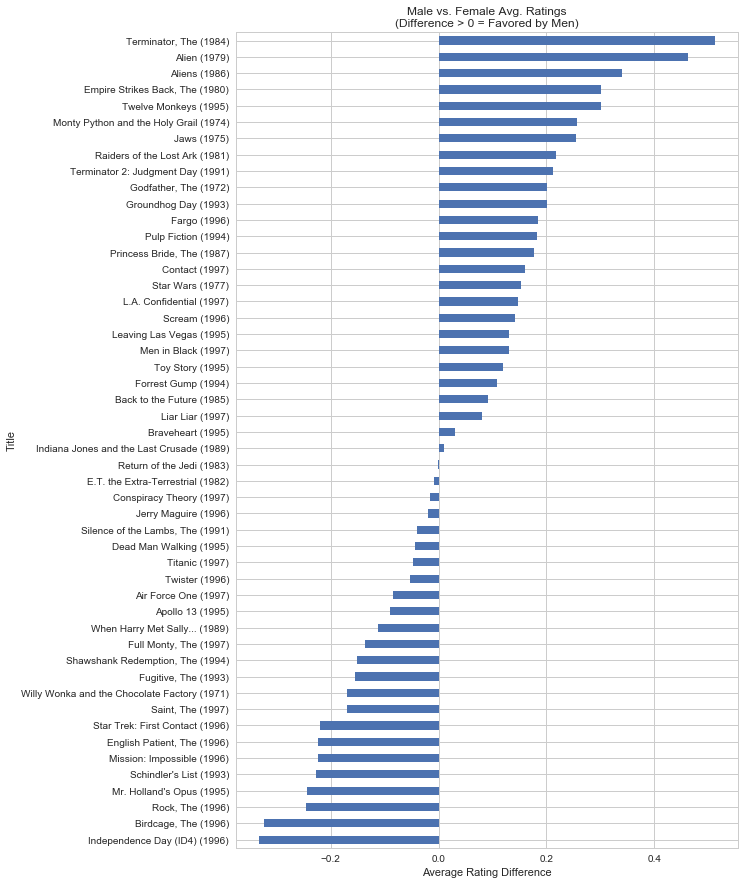

In [423]:
disagreements = pivoted[pivoted.movie_id.isin(most_50.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

# Project 4

In [475]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns; sns.set() # advanced visualization
import statsmodels.api as sm # advanced time series visualization
from pylab import rcParams

In [476]:
df = pd.read_csv('data/2011_Austin_Weather.txt')
df.head()

,13904,20110101,0053,12,OVC045,,10.00,.1,.2,.3,...,.18,.19,29.95,.20,AA,.21,.22,.23,29.95.1,.24
0,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
1,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
2,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
3,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,
4,13904,20110101,553,12,BKN065,,10.00,,,,...,015,,30.06,,AA,,,,30.06,


In [477]:
# Read the 2011_Austin_Weather.txt as a DataFrame attributing no header
df = pd.read_csv('data/2011_Austin_Weather.txt', header=None)
df.shape
df.head()

(10337, 44)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


In [478]:
with open('data/column_labels.txt') as file:
    column_labels = file.read()
    column_labels_list = column_labels.split(',')
    df.columns = column_labels_list
df.head()

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,...,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


In [479]:
# Specify the list_to_drop with labels of columns to be dropped
# Drop the columns using df.drop() and inspecting the new df_dropped.head()
list_to_drop = ['sky_conditionFlag', 'visibilityFlag', 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag', 'dry_bulb_farenFlag', 'dry_bulb_celFlag',
 'wet_bulb_farenFlag', 'wet_bulb_celFlag', 'dew_point_farenFlag',
 'dew_point_celFlag', 'relative_humidityFlag', 'wind_speedFlag',
 'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag',
 'station_pressureFlag', 'pressure_tendencyFlag', 'pressure_tendency',
 'presschange', 'presschangeFlag', 'sea_level_pressureFlag',
 'hourly_precip', 'hourly_precipFlag', 'altimeter', 'record_type',
 'altimeterFlag', 'junk']
df_dropped = df.drop(list_to_drop, axis='columns')
df_dropped.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,53,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


In [480]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 17 columns):
Wban                  10337 non-null int64
date                  10337 non-null int64
Time                  10337 non-null int64
StationType           10337 non-null int64
sky_condition         10337 non-null object
visibility            10337 non-null object
dry_bulb_faren        10337 non-null object
dry_bulb_cel          10337 non-null object
wet_bulb_faren        10337 non-null object
wet_bulb_cel          10337 non-null object
dew_point_faren       10337 non-null object
dew_point_cel         10337 non-null object
relative_humidity     10337 non-null object
wind_speed            10337 non-null object
wind_direction        10337 non-null object
station_pressure      10337 non-null object
sea_level_pressure    10337 non-null object
dtypes: int64(4), object(13)
memory usage: 1.3+ MB


In [482]:
df_dropped.date.head(2)
df_dropped.Time.head(2)
df_dropped.Time.min()
df_dropped.Time.max()

0    20110101
1    20110101
Name: date, dtype: int64

0     53
1    153
Name: Time, dtype: int64

0

2353

In [483]:
# Convert the date column to string: df_dropped['date']
df_dropped['date'] = df_dropped['date'].astype(str)
# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))
# Checking that both attributes date and Time changed from int64 to object
df_dropped[['date', 'Time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
date    10337 non-null object
Time    10337 non-null object
dtypes: object(2)
memory usage: 161.6+ KB


In [484]:
# Concatenate the new date and Time columns: date_string
# Checking the final format of date_string
date_string = df_dropped.date + df_dropped.Time
date_string.head(2)

0    201101010053
1    201101010153
dtype: object

In [452]:
import pandas as pd
# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')
# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)
# Print the output of df_clean.head()
df_clean.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


In [453]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10337 entries, 2011-01-01 00:53:00 to 2011-12-31 23:53:00
Data columns (total 17 columns):
Wban                  10337 non-null int64
date                  10337 non-null object
Time                  10337 non-null object
StationType           10337 non-null int64
sky_condition         10337 non-null object
visibility            10337 non-null object
dry_bulb_faren        10337 non-null object
dry_bulb_cel          10337 non-null object
wet_bulb_faren        10337 non-null object
wet_bulb_cel          10337 non-null object
dew_point_faren       10337 non-null object
dew_point_cel         10337 non-null object
relative_humidity     10337 non-null object
wind_speed            10337 non-null object
wind_direction        10337 non-null object
station_pressure      10337 non-null object
sea_level_pressure    10337 non-null object
dtypes: int64(2), object(15)
memory usage: 1.4+ MB


In [454]:
df_clean.loc['Jun-20-2011 8:00' : 'Jun-20-2011 9:00', 'relative_humidity']

2011-06-20 08:27:00      M
2011-06-20 08:28:00      M
2011-06-20 08:29:00      M
2011-06-20 08:30:00      M
2011-06-20 08:31:00      M
2011-06-20 08:32:00      M
2011-06-20 08:33:00      M
2011-06-20 08:34:00      M
2011-06-20 08:35:00      M
2011-06-20 08:53:00     67
Name: relative_humidity, dtype: object

In [455]:
# Convert the dry_bulb_faren, wind_speed and dew_point_faren columns to numeric values
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

# Drop date and Time columns since we alredy have them as index
# Inplace=True used to replace df_clean = df_clean.drop()
df_clean.drop(['date', 'Time'], axis='columns', inplace=True)
df_clean.head(2)

,Wban,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,12,OVC045,10.00,51.0,10.6,38,3.1,15.0,-9.4,24,15.0,360,29.42,29.95
2011-01-01 01:53:00,13904,12,OVC049,10.00,51.0,10.6,37,3.0,14.0,-10.0,23,10.0,340,29.49,30.01


In [496]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()
# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011.dry_bulb_faren.values
# Check the array values on daily_temp_2011
print(daily_temp_2011[:5])
# Checking the length of daily_temp_2011 to see if it corresponds to a year
print('Length of daily_temp_2011 array is', len(daily_temp_2011))

[ 50.16666667  39.41666667  46.84615385  53.36734694  57.96551724]
Length of daily_temp_2011 array is 365


In [497]:
# Read the file from input
df_climate_2010 = pd.read_csv('data/weather_data_austin_2010.csv')
df_climate_2010.Date = pd.to_datetime(df_climate_2010.Date)
df_climate_2010.set_index(df_climate_2010.Date, inplace=True)
# We save df_climate_2010_raw copy for using later in Question 5
df_climate_2010_raw = df_climate_2010.copy()
df_climate_2010.info()
df_climate_2010.head(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 4 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
Date           8759 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 342.1 KB


,Temperature,DewPoint,Pressure,Date
Date,,,,
2010-01-01 00:00:00,46.2,37.5,1.0,2010-01-01 00:00:00
2010-01-01 01:00:00,44.6,37.1,1.0,2010-01-01 01:00:00


In [498]:
# Downsample df_climate_2010 by day and aggregate by .mean(): daily_climate
df_climate_2010 = df_climate_2010.resample('D').mean()
# Extract the Temperature column from daily_climate
daily_temp_2010 = df_climate_2010.Temperature.values
# Check the array values on daily_temp_2010
print(daily_temp_2010[:5])
# Checking the length of daily_temp_2010 to see if it corresponds to a year
print('Length of daily_temp_2010 array is', len(daily_temp_2010))

[ 49.3375      49.79583333  49.9         49.72916667  49.84166667]
Length of daily_temp_2010 array is 365


In [499]:
difference = daily_temp_2011 - daily_temp_2010
print(difference.mean())

1.33018318701


In [500]:
# Select days that are sunny: sunny
sunny = df_clean.loc[df_clean['sky_condition'].str.contains('CLR')]
# Select days that are overcast: overcast
overcast = df_clean.loc[df_clean['sky_condition'].str.contains('OVC')]
# Resample sunny and overcast, aggregating by maximum daily temperature
sunny_daily_max = sunny.resample('D').max()
overcast_daily_max = overcast.resample('D').max()
# Print the difference between the mean of sunny_daily_max and overcast_daily_max
print(sunny_daily_max.mean() - overcast_daily_max.mean())
#EXTRANOTE: For this slicing operation you want to use str.contains() and not 
#df_clean.loc[df['sky_condition'] == 'OVC'] because when inspecting the data OVC is a category
#with many variations such as OVC011, OVC 016 etc.
print('\nFurther explanation on why using .str.contains()\n',overcast.sky_condition[:5])

Wban               0.000000
StationType        0.000000
visibility         0.174359
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64

Further explanation on why using .str.contains()
 2011-01-01 00:53:00    OVC045
2011-01-01 01:53:00    OVC049
2011-01-01 02:53:00    OVC060
2011-01-01 03:53:00    OVC065
2011-01-03 07:53:00    OVC055
Name: sky_condition, dtype: object


In [462]:
# Select the visibility and dry_bulb_faren columns: visibility_temperature
visibility_temperature = df_clean[['visibility', 'dry_bulb_faren']]
# .resample and checking .head()
weekly_mean = visibility_temperature.resample('w').mean()
weekly_mean.head(2)
visibility_temperature.info()

,dry_bulb_faren
2011-01-02,44.791667
2011-01-09,50.246637


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10337 entries, 2011-01-01 00:53:00 to 2011-12-31 23:53:00
Data columns (total 2 columns):
visibility        10337 non-null object
dry_bulb_faren    10326 non-null float64
dtypes: float64(1), object(1)
memory usage: 562.3+ KB


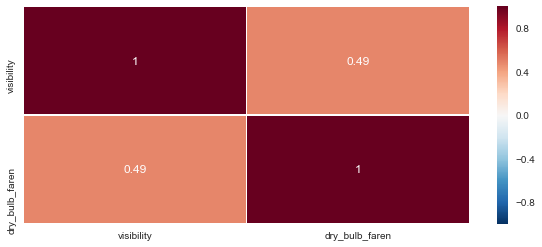

In [501]:
# Converting visibility from object pd.to_numeric() on the original set df_clean
# It is not a good practice to convert types on data slices or copies!
df_clean['visibility'] = pd.to_numeric(df_clean['visibility'], errors='coerce')
visibility_temperature = df_clean[['visibility', 'dry_bulb_faren']]
# .resample and checking .head()
weekly_mean = visibility_temperature.resample('w').mean()
# Print the output of weekly_mean.corr() using seaborn sns.heatmap()
plt.figure(figsize=(10,4))
ax = sns.heatmap(weekly_mean.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5);

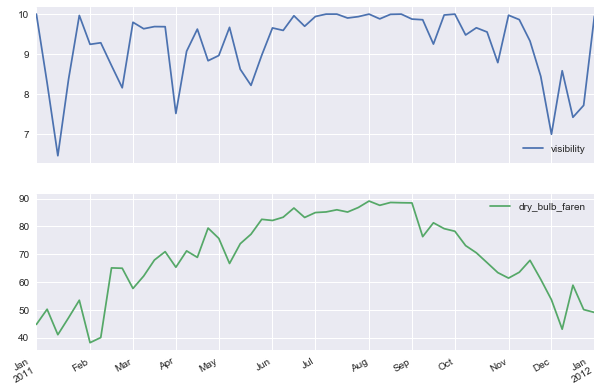

In [465]:
# Setting figure sizes for all figures from now on
# rcParams['figure.figsize'] could be used for individual size changes
# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True, figsize=(10,7))
plt.show();

Checking types of daily_temp attributes 
2010: <class 'pandas.core.series.Series'>
2011: <class 'pandas.core.series.Series'>

Checking types of daily_temp attributes 
2010: <class 'pandas.core.series.Series'>
2011: <class 'pandas.core.series.Series'>

Checking shapes of daily_temp attributes 
2010: (365,)
2011: (365,)


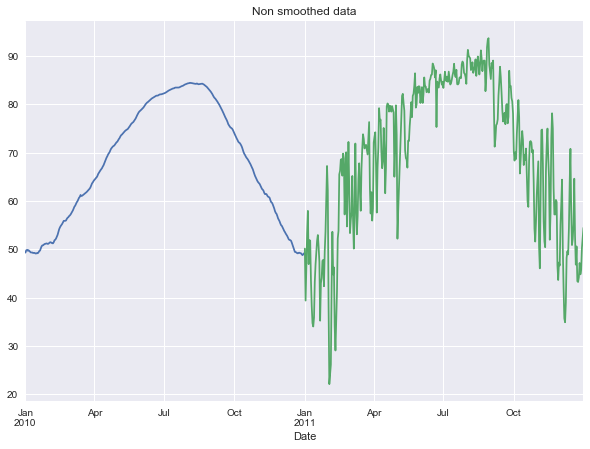

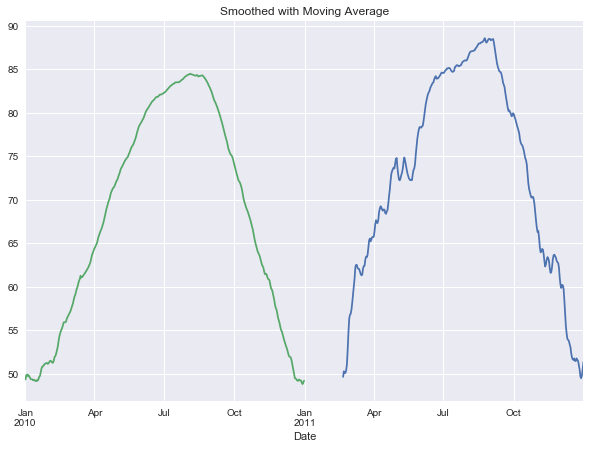

In [467]:
# Checking attributes type()
print('Checking types of daily_temp attributes \n2010: %s\n2011: %s' % (type(daily_temp_2010), type(daily_temp_2011)))
# Redo the attributes with .resample()
# Extract the Temperature columns from both attributes
# Checking attributes type() and .shape after converting
df_climate_2010 = df_climate_2010.resample('D').mean()
daily_temp_2010 = df_climate_2010.Temperature
daily_mean_2011 = df_clean.resample('D').mean()
daily_temp_2011 = daily_mean_2011.dry_bulb_faren
print('\nChecking types of daily_temp attributes \n2010: %s\n2011: %s' % (type(daily_temp_2010), type(daily_temp_2011)))
print('\nChecking shapes of daily_temp attributes \n2010: %s\n2011: %s' % (daily_temp_2010.shape, daily_temp_2011.shape))

# Hotter days .plot()
plt.figure(figsize=(10,7));
daily_temp_2010.plot()
daily_temp_2011.plot()
plt.title('Non smoothed data');
plt.show();

# Smoothing data with a moving average using df.rolling().mean()
# Slicing smoothed_daily_temp_2011 in [50:] to remove mooving average effect
smoothed_daily_temp_2011 = daily_temp_2011.rolling(window=24).mean()[50:]
plt.figure(figsize=(10,7));
smoothed_daily_temp_2011.plot();
daily_temp_2010.plot();
plt.grid(True);
plt.title('Smoothed with Moving Average');
plt.show();

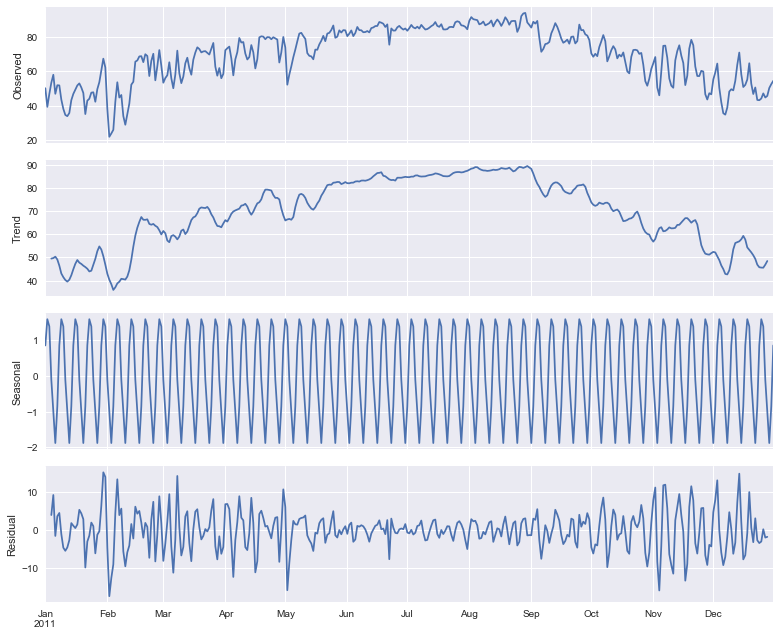

In [468]:
# Decomposition technique for further details on time series
decomposition = sm.tsa.seasonal_decompose(daily_temp_2011, model='additive')
rcParams['figure.figsize'] = 11, 9
fig = decomposition.plot();
plt.show();

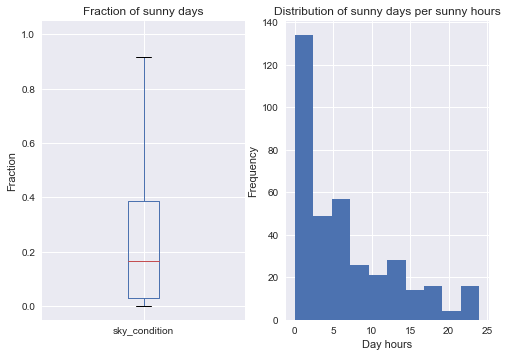

In [502]:
# Retriving a Boolean Series for sunny days: sunny
sunny = df_clean['sky_condition'].str.contains('CLR')
# Resample sunny by day and compute sum: sunny_hours
# Resample sunny by day and compute count: total_hours
# Divide sunny_hours by total_hours: sunny_fraction
sunny_hours = sunny.resample('D').sum()
total_hours = sunny.resample('D').count()
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
fig, axes = plt.subplots(nrows=1, ncols=2)
fig1 = sunny_fraction.plot(kind='box', ax=axes[0], 
title='Fraction of sunny days');
fig1.set_ylabel('Fraction');
fig2 = sunny_hours.plot(kind='hist', ax=axes[1], 
title='Distribution of sunny days per sunny hours');
fig2.set_xlabel('Day hours');
rcParams['figure.figsize'] = 21, 12;
plt.show();

In [510]:
diffTemp=daily_temp_2011>daily_temp_2010
diffTemp.sum()/len(diffTemp)

0.66575342465753429